In [8]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import LSF
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from spectacle.modeling.fitting import Fitter
from astropy.modeling.models import Linear1D
from spectacle.core.models import Voigt1D

from uncertainties import unumpy as unp

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 8]

# Identify and parameterize real data
This is an example notebook of taking some real data and fitting an absorption feature. It is very basic, and uses all the default settings.

## Load data
Load the data. The fitter currently assumes that all data has been normalized to 1.

In [31]:
# Load real data
# hdulist = fits.open("/Users/nearl/projects/hst_proposal/QSOALS/3C066A/3C066A_coadd_FUVM_final_all.fits")
# disp, flux, uncert, dq = hdulist[1].data['WAVE'], hdulist[1].data['FLUX'], \
#                          hdulist[1].data['ERROR'], hdulist[1].data['DQ']
disp = np.arange(1150, 1250, 0.1)

spectrum1 = Spectrum1D(dispersion=disp, uncertainty=np.random.sample(1000) * 0.005)
spectrum1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=1e7, column_density=10**14.66, name="Halpha")
spectrum1.add_noise(std_dev=0.1)
# cos_lsf = LSF(instrument='cos')
# spectrum1.add_lsf(cos_lsf)

disp, flux, uncert = spectrum1.dispersion, spectrum1.flux, spectrum1.uncertainty


<Container object of 3 artists>

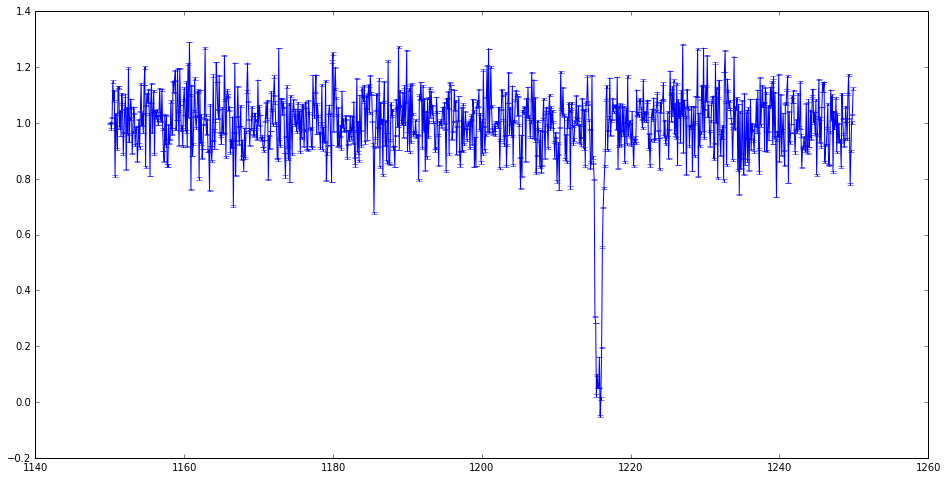

In [32]:
# Create a mask and apply it since we don't really care about the entire spectrum
# mask = [(disp > 1150) & (disp < 1260)]

# flux = flux[mask]
# disp = disp[mask]
# uncert = uncert[mask]

# temp_flux = unp.uarray(flux, uncert)
# temp_flux /= np.max(temp_flux)
# flux, uncert = unp.nominal_values(temp_flux), unp.std_devs(temp_flux)

# Currently, the fitting assumes that the data is normalized to 1.0
# flux /= np.median(flux)
# uncert /= np.median(flux)

# Create spectrum object
spectrum = Spectrum1D(disp, flux, uncertainty=uncert)

# Plot the spectrum
plt.errorbar(spectrum.dispersion, spectrum.flux, yerr=spectrum.uncertainty)
# plt.plot(spectrum.dispersion, spectrum.flux)

## Create `Fitter`
The `Fitter` object encapsulates the method of fitting, along with the line identifying and detrending routines. Certain parameters, like the distance between identified lines, and the noise level can also be set.

Found 2 peaks
Finished applying lines
   Parameter       Original Value     Fitted Value   Uncertainty
---------------- ----------------- ----------------- -----------
         slope_0               0.0               0.0         0.0
     intercept_0               1.0               1.0         0.0
      lambda_0_1            1185.5     1185.62367178         inf
       f_value_1               0.5               0.0         inf
         gamma_1        19500000.0        19500000.0         0.0
     v_doppler_1        10000000.0     4188704.38607         inf
column_density_1 3.21248454129e+13 3.30131997137e+14         inf
      lambda_0_2            1215.9      1215.7223198         inf
       f_value_2               0.5    0.303826814722         inf
         gamma_2       626500000.0       626500000.0         0.0
     v_doppler_2        10000000.0     12299885.8495         inf
column_density_2 1.05099414645e+14 5.32717550271e+14         inf


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


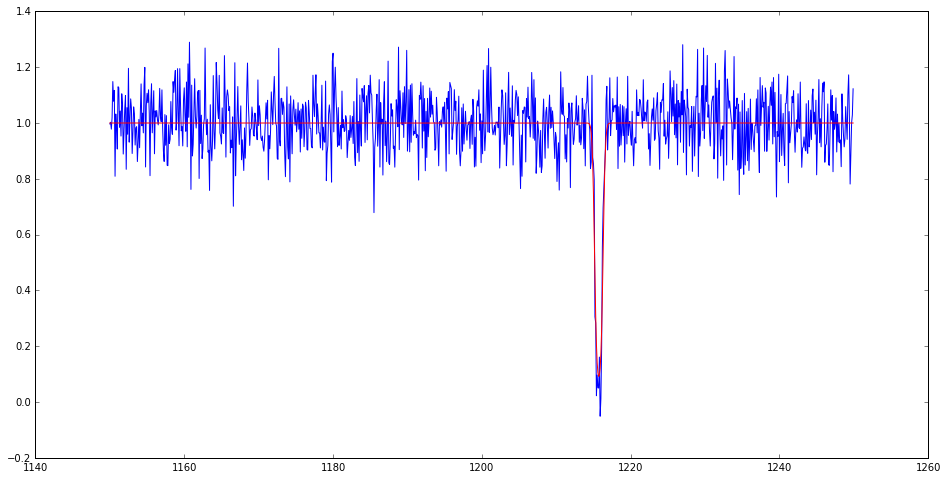

In [33]:
# Create a fitter. The default fitting routine is a LevMarLSQ.
fitter = Fitter()
result_spectrum = fitter(spectrum)
print(fitter.fit_info)

# Plot the fitted spectrum with the original
plt.plot(spectrum.dispersion, spectrum.flux)
plt.plot(result_spectrum.dispersion, result_spectrum.flux, color='red')

Let's get some first- and second-order information out of this.

In [34]:
print("Equivalent width: {}".format(result_spectrum.equivalent_width()))
print("FWHM: {}".format(result_spectrum.fwhm(1356)))
print("Optical Depth: {}".format(result_spectrum.optical_depth(1356)))
print("Centroid: {}".format(result_spectrum.centroid(1356)))

Equivalent width: (1.0755967340567743, 0.0)
FWHM: 1253003823.0643911
Optical Depth: (array(1.499776247493227e-08), array(0.0))
Centroid: (array(1199.778330786462), array(0.0))
